# Samantha Gilbert

## Homework #2

## Galaxies

## Winter 2021



### Problem 1

We are given the equation for the isochrone:

$$\phi(r) =  -\frac{GM}{b + \sqrt{b^2 + r^2}}$$

First, we want to show that the isochrone behaves as a harmonic oscillator in the core in the limit where $r << b$. We Taylor expand the isochrone potential around $r=0$ to second order, finding

$$\phi(r=0) \approx -\frac{GM}{2b} + \frac{GMr^2}{8b^3} $$ 

A harmonic oscillator potential obeys the form $\phi{r} = a + \frac{kr^2}{2}$, where $r$ is the displacement, $k$ is some spring constant, and $a$ is a constant. Our expanded $\phi(r)$ obeys this functional form, with a dependence on $r^2$ and $k = \frac{GM}{8b^3}$ and initial constant $c = -\frac{GM}{2b}$. Thus, we have shown that the expanded isochrone around $r = 0$ behaves as a harmonic oscillator. 

We now want to show that in the limit where $r >> b$ that the isochrone potential behaves as a point mass. Taking the limit as $r \rightarrow \infty$, we find that $b$ becomes trivially small so that

$$\phi(r >> b) \approx -\frac{GM}{r}$$

A point mass potential obeys the functional form $\phi = -\frac{Gm}{r}$. By taking the limit where $r >> b$, we have successfully collapsed the isochrone to this functional form as required.

### Problem 2

We install the galpy orbital dynamics library.

In [27]:
#---------------------------------Import modules----------------------------------# 

import galpy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
plt.rcParams["font.family"] = "Times New Roman"

#---------------------------------------------------------------------------------# 

Using galpy's plotting function, we now want to plot the normalized rotation curve given by the sum of the Myamoto-Nagai, Navarro-Frenk-White, and Hernquist potentials in the range of $r = [0,10]$.

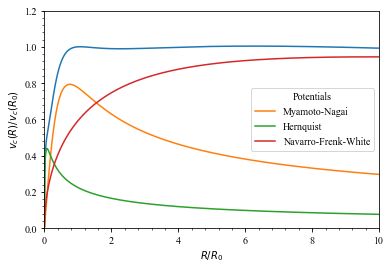

In [23]:
from galpy.potential import NFWPotential, HernquistPotential, plotRotcurve
mp = MiyamotoNagaiPotential(a=0.5,b=0.0375,normalize=.6)
np = NFWPotential(a=4.5,normalize=.35)
hp = HernquistPotential(a=0.6/8,normalize=0.05)

plotRotcurve(hp+mp+np,Rrange=[0.00001,10.],grid=1001,yrange=[0.,1.2]) # Start at r = 0.00001 to avoid runtime errors from dividing by zero.
mp.plotRotcurve(Rrange=[0.00001,10.],grid=1001,overplot=True, label='Myamoto-Nagai')
hp.plotRotcurve(Rrange=[0.00001,10.],grid=1001,overplot=True, label='Hernquist')
np.plotRotcurve(Rrange=[0.00001,10.],grid=1001,overplot=True, label='Navarro-Frenk-White')
plt.legend(title='Potentials')

The combined rotation curve (blue line) appears to correspond nicely to observations. While Keplerian predictions would suggest that rotational velocity decrease with distance following the initial bulge, our observations with dark matter show a flat relationship. This is one of the fundamental pieces of evidence for the existence of dark matter.

At $R = 1$, the Myamoto-Nagai potential dominates, where the Myamoto-Nagai potential approximates galactic disks. At $R = 10$, the Navarro-Frenk-White potential dominates, where the it representes dark matter halos. As $R \rightarrow \infty$, the potentials for "normal" matter appear to drop off, approximating a point mass potential as expected. The dark matter potential must defy this behavior, increasing with distance to explain the observed galactic rotation curves.

### Problem 3

We will now use galpy's orbit plotting routines to plot the $R$, $z$ motion of a particle orbiting in an isochrone potential with $b=1$ whose intial coordinates are $R = (1,0)$ and has initial velocity $(v_R, v_T, v_z) = (1, 1.1, 0.1)$.

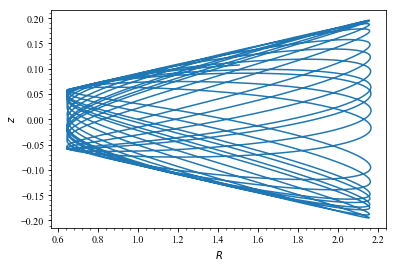

In [28]:
from galpy.orbit import Orbit
from galpy.potential import IsochronePotential
import numpy as np

ip = IsochronePotential(b=1,amp=1.,normalize=1.)

# Orbit takes 5 arguments: [R,vR,vT,z,vz]
o = Orbit([1.,1.,1.1,0.,0.1])
ts = np.linspace(0,100,10000)
o.integrate(ts,ip,method='odeint')

o.plot()

We now want to try to plot a circular orbit. In (R, z) space, a circular orbit will appear as a lone point. For a more interesting plot, we will plot the orbit in (x, y) space, where it should appear circular. To track the orbit in the (x, y) plane, we add a $\phi$ coordinate, arbitrarily setting it to $\phi = 0$. To create a circular orbit, we set $v_R = v_z = 0$. We arbitrarily set $z = 0$ as the point of origin along the z axis.

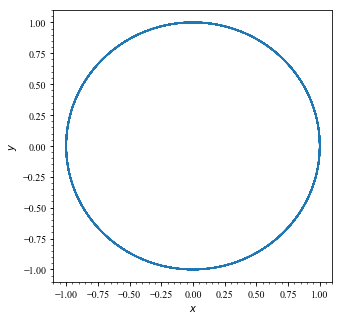

In [56]:
ip = IsochronePotential(b=1,amp=1.,normalize=1.)

# Orbit takes 6 arguments: [R,vR,vT,z,vz,phi]
o = Orbit([1.,0.,1.,0.,0.,0.])
ts = np.linspace(0,100,10000)
o.integrate(ts,ip,method='odeint')

#o.plot3d()
o.plot(d1='x',d2='y')
plt.rcParams["figure.figsize"] = (8,5)